# Example of Data Clustering with KMeans

First we import all necessary libraries and specific the name of file with data.
The library pandas is to read easily the csv files, while the library sklearn have the many algorithms about machine learning.

In [108]:
#import libraries
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
%matplotlib inline
from  matplotlib import pyplot
import seaborn
from scipy.spatial.distance import cdist, pdist
import numpy as np

# Graph of web by Google
This dataset was get from: https://snap.stanford.edu/data/web-Google.html. In this dataset, nodes represent web pages and directed arcs represent hyperlinks between them. This dataset have 875713 nodes and 5105039 arcs.

Below, we read the data.
The first four lines is the head of data. This dataset have two columns, separate by tab, first column is the node source
and seccond columns is the node destination. 

In [2]:
#read the dataset and print the names of columns
df = pd.read_csv('web-Google.txt', skiprows=4, delimiter='\t', header=None, names=['source', 'destination'])
df.columns

Index(['source', 'destination'], dtype='object')

In [3]:
#Print the first 5 lines of dataset 
df.head(5)

,source,destination
0,0,11342
1,0,824020
2,0,867923
3,0,891835
4,11342,0


## We need to calculate the number of arcs that enter and leave each node

In [4]:
#count the number of arcs that enter each node
number_input_arcs = df.groupby(['source']).count()['destination']

#count the number of arcs that leave each node
number_output_arcs = df.groupby(['destination']).count()['source']

#Create a new dataset with columns node, inputs and output, where inputs and outputs are the number of arcs
#that enter and leave each node, respectively
google_graph = pd.DataFrame({'inputs':  number_input_arcs, 'outputs': number_output_arcs})
google_graph.fillna(value=0, inplace=True)
google_graph['nodes'] = range(0, len(google_graph))

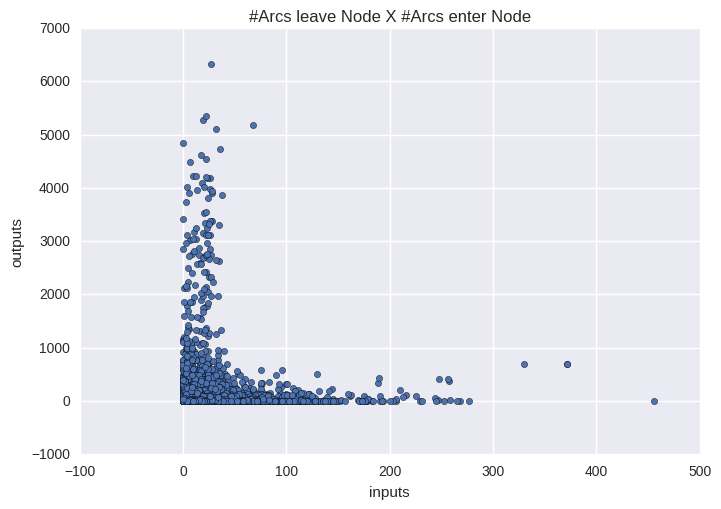

In [5]:
google_graph.plot.scatter(x='inputs', y='outputs', title='#Arcs leave Node X #Arcs enter Node')

# Define the number of cluster

In [99]:
number_of_cluster = 5

# Cluster dataset only using number of arcs that enter each node

In [7]:
#Create a data set only with the data about number of arcs that enter each node
#inputs is a list of list. Each list have the number of arcs that enter in a specifc node.
inputs = [[input] for input in google_graph['inputs'].values]

#Clustering using KMeans algorithm
kmeans = KMeans(n_clusters=number_of_cluster).fit(inputs)

#kmeans.labels_ have the cluster that each node belongs to
google_graph['groups_inputs'] = kmeans.labels_

## Plot result

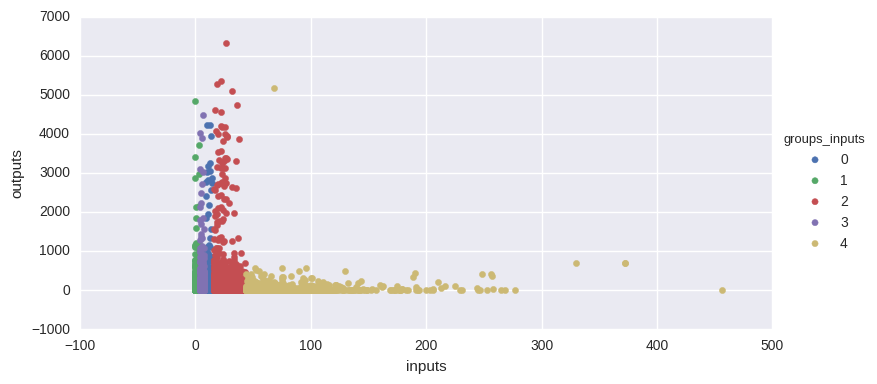

In [8]:
# Plot the nodes. Each color represents a cluster.
fg = seaborn.FacetGrid(data=google_graph, hue='groups_inputs', size=4, aspect=2)
fg.map(pyplot.scatter, 'inputs', 'outputs').add_legend()

# Cluster dataset only using number of arcs that leave each node

In [9]:
#Create a data set only with the data about number of arcs that leave each node
#outputs is a list of list. Each list have the number of arcs that leave in a specifc node.
outputs = [[output] for output in google_graph['outputs'].values]

#Clustering using KMeans algorithm
kmeans = KMeans(n_clusters=number_of_cluster).fit(outputs)

#kmeans.labels_ have the cluster that each node belongs to
google_graph['groups_outputs'] = kmeans.labels_

## Plot result

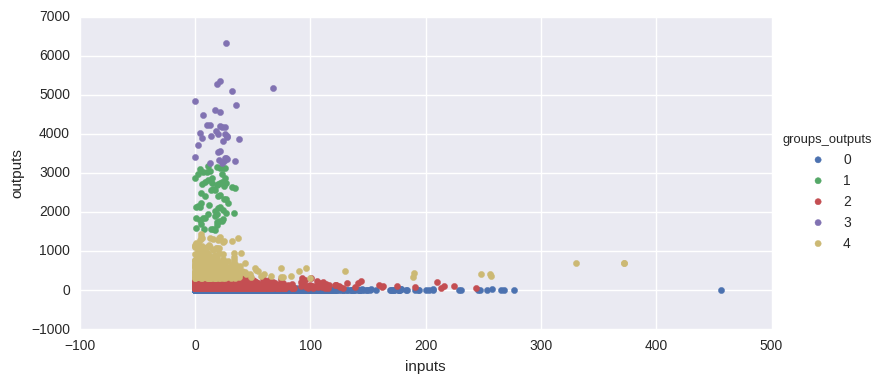

In [10]:
# Plot the nodes. Each color represents a cluster.
fg = seaborn.FacetGrid(data=google_graph, hue='groups_outputs', size=4, aspect=2)
fg.map(pyplot.scatter, 'inputs', 'outputs').add_legend()

# Cluster dataset using number of arcs that enter and leave each node

In [11]:
#Create a data set only with the data about number of arcs that enter and leave each node
#inputs_outputs is a list of list. Each list have the number of arcs that enter and leave in a specifc node.
inputs_outputs = [[input, output] for input, output in zip(google_graph['inputs'].values, google_graph['outputs'].values)]
kmeans = KMeans(n_clusters=number_of_cluster).fit(inputs_outputs)

#kmeans.labels_ have the cluster that each node belongs to
google_graph['groups'] = kmeans.labels_

## Plot result

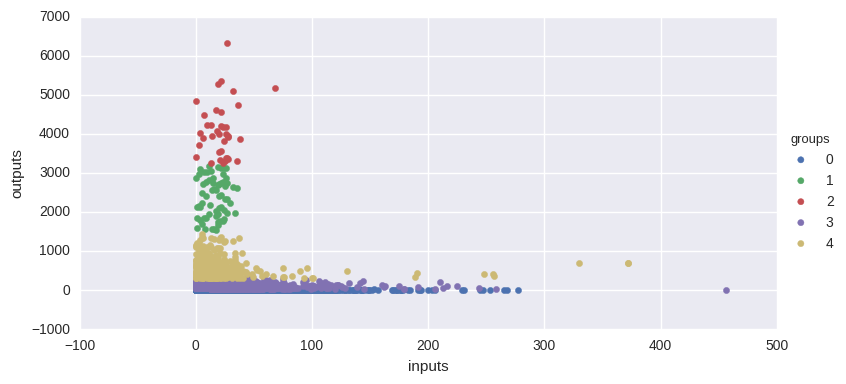

In [12]:
fg = seaborn.FacetGrid(data=google_graph, hue='groups', size=4, aspect=2)
fg.map(pyplot.scatter, 'inputs', 'outputs').add_legend()

# What is the best number of cluster?
A good paper for methods to choice the number of cluster: http://www.ee.columbia.edu/~dpwe/papers/PhamDN05-kmeans.pdf

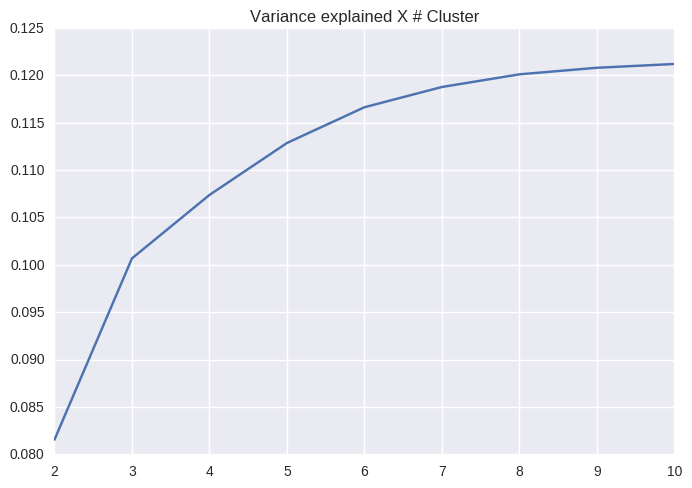

In [106]:
inputs_outputs_filter = inputs_outputs[:15000]
min_cluster = 2
max_cluster = 10
k_range = range(min_cluster, max_cluster + 1)

#Calculate kmeans for each value of k
kmeans = [KMeans(n_clusters=k).fit(inputs_outputs_filter) for k in k_range]

#Calculate centroids for each cluster k
centroids = [X.cluster_centers_ for X in kmeans]

#Calculate the Euclidian distance from each point to each cluster center
k_euclid = [cdist(inputs_outputs_filter, cent) for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

#Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

#Total sum of squares
tss = sum(pdist(inputs_outputs_filter)**2)/len(inputs_outputs_filter)

#The between-cluster sum of squares
bss = tss - wcss

#Normalize
bss = bss / bss.sum()

#plot
pyplot.plot(k_range, bss)
pyplot.title('Variance explained X # Cluster')
pyplot.show()

# Questions
1) Explain the difference of centroids. 

2) Calculate the #number of enter arcs in each node / #number of leave arcs in each node and cluster with kmeans

3) Explain what is the cluster when k = 1

4) Explain what is the cluster when k = size of the dataset

# Cluster with Iris Dataset
This code has been downloaded:http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

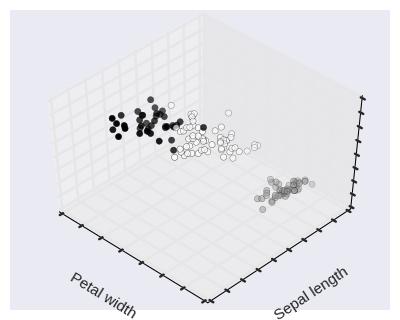

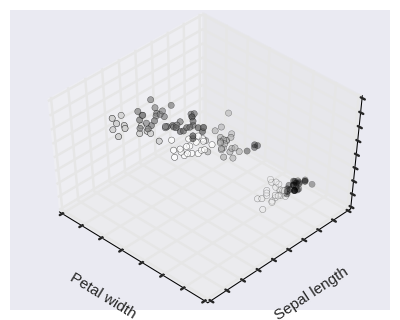

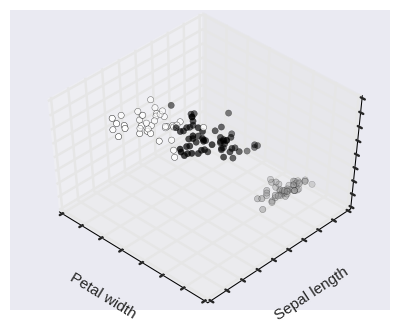

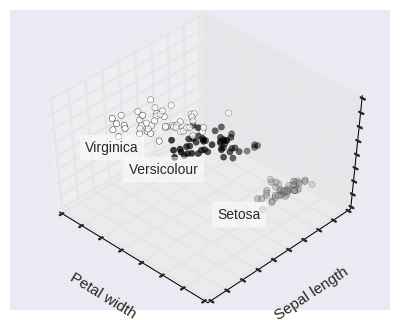

In [119]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()